In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta


In [2]:

# Load data
df = pd.read_csv("synthetic_disease_data.csv")

In [3]:

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [4]:

# Encode categorical variables
area_encoder = LabelEncoder()
disease_encoder = LabelEncoder()

df["AreaEnc"] = area_encoder.fit_transform(df["Area"])
df["DiseaseEnc"] = disease_encoder.fit_transform(df["Disease"])


In [5]:

# Features and target
X = df[["AreaEnc", "Month", "Year", "NumPatients"]]
y = df["DiseaseEnc"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:

# Predict for next month
last_date = df["Date"].max()
next_month = last_date + timedelta(days=30)

pred_data = []
for area in df["Area"].unique():
    num_patients = np.random.poisson(lam=df[df["Area"] == area]["NumPatients"].mean())
    pred_data.append([area_encoder.transform([area])[0], next_month.month, next_month.year, num_patients])

pred_df = pd.DataFrame(pred_data, columns=["AreaEnc", "Month", "Year", "NumPatients"])
pred_df["PredDiseaseEnc"] = model.predict(pred_df)
pred_df["PredDisease"] = disease_encoder.inverse_transform(pred_df["PredDiseaseEnc"])
pred_df["Area"] = area_encoder.inverse_transform(pred_df["AreaEnc"])

print("Predictions for next month:")
print(pred_df[["Area", "PredDisease", "NumPatients"]])


Predictions for next month:
      Area PredDisease  NumPatients
0    North      Dengue           58
1    South     Malaria           55
2     East      Dengue           75
3     West     Malaria           48
4  Central      Dengue           70


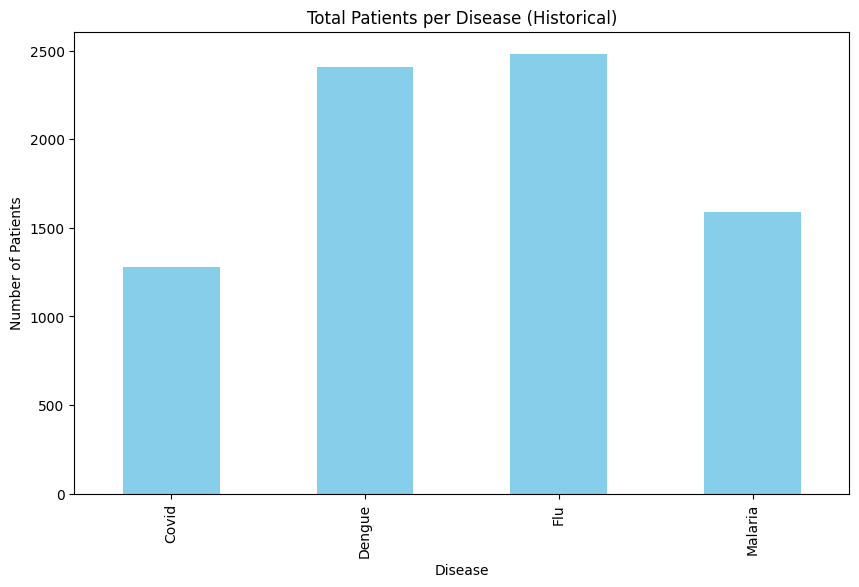

In [7]:

# Visualization
plt.figure(figsize=(10,6))
df.groupby("Disease")["NumPatients"].sum().plot(kind="bar", color="skyblue")
plt.title("Total Patients per Disease (Historical)")
plt.ylabel("Number of Patients")
plt.show()


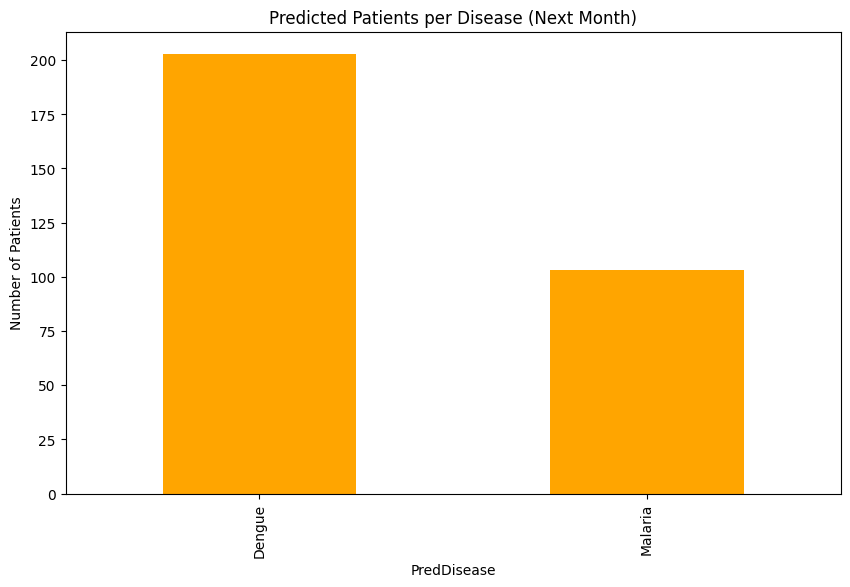

In [8]:

plt.figure(figsize=(10,6))
pred_df.groupby("PredDisease")["NumPatients"].sum().plot(kind="bar", color="orange")
plt.title("Predicted Patients per Disease (Next Month)")
plt.ylabel("Number of Patients")
plt.show()